## Excerise_2_11_2

dx= 1.2e-09 Nox= 0 interface1= 0 interface2= 5


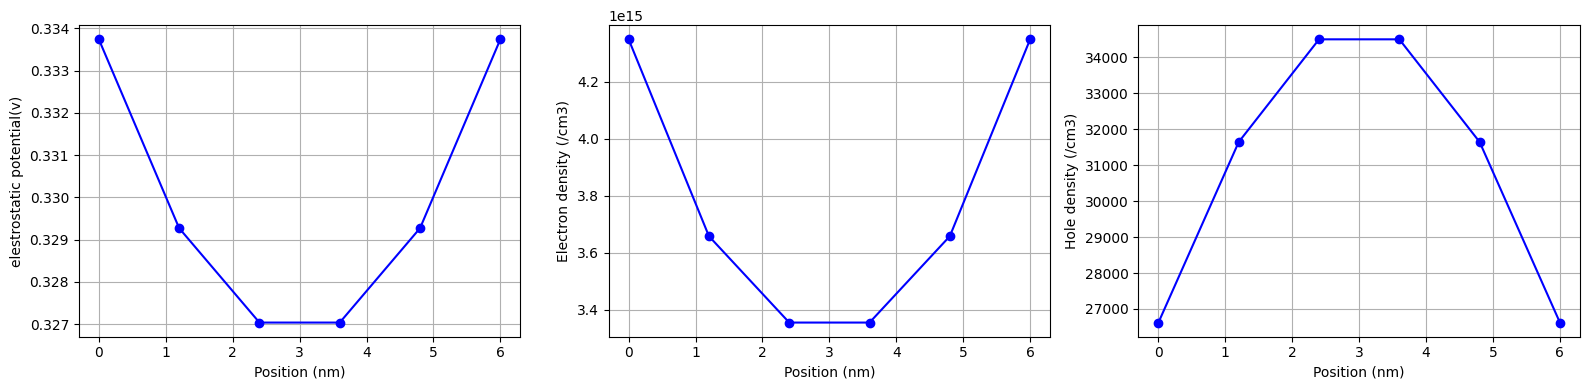

(None, None)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

q = 1.602192e-19; epsilon0 = 8.854187817e-12; nint = 1.076e10*1e6; kB = 1.380662e-23; T = 300.0; VT = kB*T/q

a = 6e-9; tox = 0.5e-9; epsilon_si = 11.7; epsilon_ox = 3.9; Ndop = -1e18*1e6
N = 5; dx = a/N; Nox = round(tox/dx); interface1 = Nox; interface2 = N-Nox
print("dx=",dx,"Nox=",Nox, "interface1=",interface1, "interface2=",interface2 )
x = np.arange(N+1)*dx

phi = np.zeros((N+1, 1  )); hole = np.zeros((N+1, 1  )); elec = np.zeros((N+1, 1  ))
A = np.zeros((N+1, N+1)); b = np.zeros((N+1, 1  ))

# newton raphson iteration
for inewton in range(1,5):

    # initial potential value to cal jacobian equation    
    for ii in range(1,N):
        epsilon_l = epsilon_ox; epsilon_r = epsilon_ox
        if ii>=interface1+1 and ii<=interface2:
            epsilon_l = epsilon_si
        if ii>=interface1 and ii<=interface2-1:
            epsilon_r = epsilon_si
        A[ii,ii-1] = epsilon_l
        A[ii,ii  ] = -epsilon_l-epsilon_r
        A[ii,ii+1] = epsilon_r
        b[ii] = epsilon_r*(phi[ii+1]-phi[ii])-epsilon_l*(phi[ii]-phi[ii-1])
 
    for ii in range(interface1,interface2+1): 
        control = 1.0
        if ii==interface1 or ii==interface2: 
            control = 0.5
        hole[ii] = nint*np.exp(-phi[ii]/VT)
        elec[ii] = nint*np.exp( phi[ii]/VT)
        A[ii,ii] = A[ii,ii] - q*(hole[ii][0]+elec[ii][0])*dx**2*control/VT/epsilon0 #Jacobina matrix J*delta_phi=-residue
        b[ii] = b[ii] + q*(hole[ii]-elec[ii]+Ndop)*dx**2*control/epsilon0 #residue vector

    b[0] = phi[0] - 0.33374    
    b[N] = phi[N] - 0.33374
    A[0,0] = 1    
    A[N,N] = 1
    update=np.linalg.solve(A,-b)
    phi=phi+update
    #print("update=",[inewton],[ii],update.T)
    #print("phi=",[inewton],[ii],phi.T)

plt.figure(figsize=(16,4))
plt.subplot(131)
plt.plot(x/1e-9,phi,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('elestrostatic potential(v)')
plt.grid()

plt.subplot(132)
plt.plot(x/1e-9,elec/1e6,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Electron density (/cm3)')
plt.grid()

plt.subplot(133)
plt.plot(x/1e-9,hole/1e6,'bo-')
plt.xlabel('Position (nm)')
plt.ylabel('Hole density (/cm3)')
plt.grid()

plt.tight_layout(), plt.show()


0.0
0.1
0.2
0.30000000000000004
0.4
0.5
0.6000000000000001
0.7000000000000001
0.8
0.9
1.0


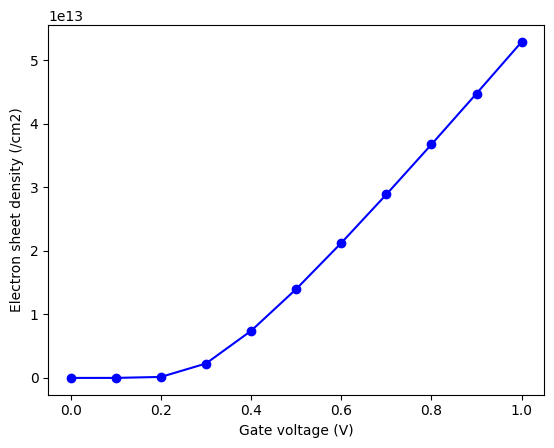

In [12]:
import math
import numpy as np
import matplotlib.pyplot as plt

q = 1.602192e-19
epsilon0 = 8.854187817e-12
nint = 1e16
kB = 1.38065e-23 # Boltzmann constant
T = 300.0
VT = kB*T/q

# a is the length in m.
a = 6e-9
tox = 0.5e-9
N = 24
l0 = a/N
iox = round(tox/l0)
interface1 = iox
interface2 = N-iox
epsilon_si = 11.7
epsilon_ox = 3.9
Ndop = -1e25

x = np.arange(N+1)* a / N

phi = np.zeros( (N+1, 1  ) )
hole = np.zeros( (N+1, 1  ) )
elec = np.zeros( (N+1, 1  ) )

A = np.zeros( (N+1, N+1) )
b = np.zeros( (N+1, 1  ) )

QV = np.zeros( (11,2) )

for ibias in range(0,11):
    
    VG = 0.1*ibias
    print(VG)
    QV[ibias,0] = VG
    
    for inewton in range(1,10):
        
        for ii in range(1,N):
            
            epsilon_l = epsilon_ox
            epsilon_r = epsilon_ox
            if ii>=interface1+1 and ii<=interface2:
                epsilon_l = epsilon_si
            if ii>=interface1 and ii<=interface2-1:
                epsilon_r = epsilon_si    

            b[ii] = epsilon_r*(phi[ii+1]-phi[ii])-epsilon_l*(phi[ii]-phi[ii-1])
            A[ii,ii-1] = epsilon_l
            A[ii,ii  ] = -epsilon_l-epsilon_r
            A[ii,ii+1] = epsilon_r

        QV[ibias,1] = 0.0
        for ii in range(interface1,interface2+1):
            control = 1.0
            if ii==interface1 or ii==interface2:
                control = 0.5
            hole[ii] = nint*np.exp(-phi[ii]/VT)
            elec[ii] = nint*np.exp( phi[ii]/VT)
            b[ii] = b[ii] + q*(hole[ii]-elec[ii]+Ndop)/epsilon0*l0*l0*control
            A[ii,ii] = A[ii,ii] - q*(hole[ii][0]+elec[ii][0])/VT/epsilon0*l0*l0*control
            QV[ibias,1] = QV[ibias,1] + elec[ii][0]*l0*control

        b[0] = phi[0] - 0.33374 - VG
        A[0,0] = 1
        b[N] = phi[N] - 0.33374 - VG
        A[N,N] = 1

        update = np.linalg.solve(A, b)

        phi = phi - update

plt.plot(QV[:,0],QV[:,1]/1e4,'bo-')
plt.xlabel('Gate voltage (V)')
plt.ylabel('Electron sheet density (/cm2)')
plt.show()
#plt.plot(x,elec/1e6,'bo-')
#plt.xlabel('Position (nm)')
#plt.ylabel('Electron density (1)')
#plt.show()